In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [3]:
df=pd.read_csv("C:\\Users\computer\LR.csv")

In [4]:
df.tail

<bound method NDFrame.tail of        X           Y
0      1    3.888889
1      2    4.555556
2      3    5.222222
3      4    5.888889
4      5    6.555556
..   ...         ...
295  296  200.555556
296  297  201.222222
297  298  201.888889
298  299    1.888889
299  300    1.888889

[300 rows x 2 columns]>

In [5]:
df.head

<bound method NDFrame.head of        X           Y
0      1    3.888889
1      2    4.555556
2      3    5.222222
3      4    5.888889
4      5    6.555556
..   ...         ...
295  296  200.555556
296  297  201.222222
297  298  201.888889
298  299    1.888889
299  300    1.888889

[300 rows x 2 columns]>

In [6]:
df.corr()

,X,Y
X,1.000000,0.959876
Y,0.959876,1.000000


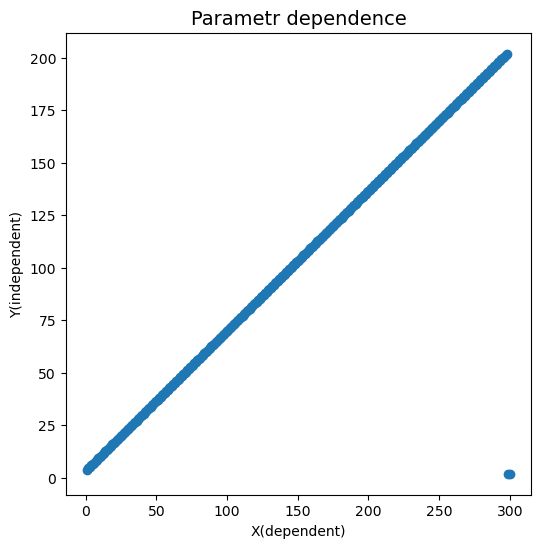

In [7]:
plt.figure(figsize=(6,6))
X=df['X']
Y=df['Y']
plt.scatter(X,Y)
plt.xlabel('X(dependent)',fontsize=10)
plt.ylabel('Y(independent)',fontsize=10)
plt.title('Parametr dependence', fontsize=14)
plt.show()

In [8]:
def find_coef(df):
    x_mean =df['X'].mean()
    y_mean =df['Y'].mean()
    k= sum ([(x-x_mean)*(y-y_mean)for x,y in list(zip(df['X'],df['Y']))])/ \
    sum([(x-x_mean)** 2for x in list(df['X'])])
    m = y_mean -k *x_mean
    return{'x_mean':x_mean,'y_mean':y_mean,'k':k, 'm':m}
coefs = find_coef(df)
print(coefs)

{'x_mean': 150.5, 'y_mean': 102.21555556172665, 'k': 0.6400448894359696, 'm': 5.888799701613223}


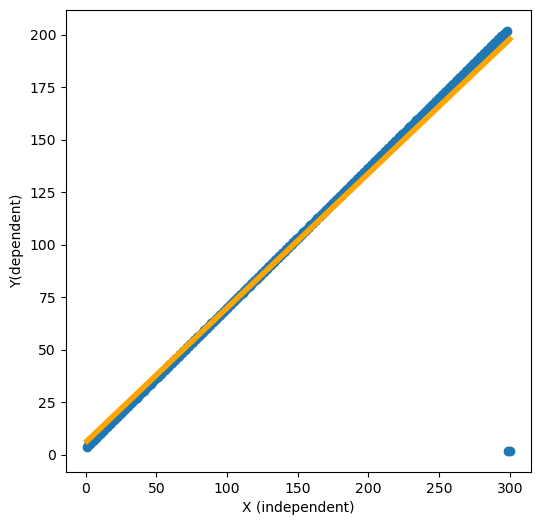

In [9]:
plt.figure(figsize=(6,6))
X = df['X']
Y = df['Y']
plt.scatter(X,Y)
plt.plot(X,coefs['m']+coefs['k']* X, color='orange',linewidth=4)
plt.xlabel('X (independent)',fontsize=10)
plt.ylabel('Y(dependent)',fontsize=10)
plt.show()

In [10]:
x =df['X'].values
y =df['Y'].values

In [11]:
X_all=x.reshape(-1,1)
Y_all= y

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_all, y)

LinearRegression()

In [14]:
y_predict =model.predict(X_all)

In [15]:
y_predict[200],y[200]

(134.53782247824313, 137.2222222)

In [16]:
print(f'R2 Score:{r2_score(y, y_predict)}')
print(f'Root MSE:{np.sqrt(mean_squared_error(y,y_predict))}')
print(f'coefficients:{model.coef_[0]}')
print(f'Intercept:{model.intercept_}')

R2 Score:0.9213615685311795
Root MSE:16.19351126670784
coefficients:0.6400448894359698
Intercept:5.888799701613209


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, train_size=0.8, test_size=0.2,
random_state=21, shuffle=True)

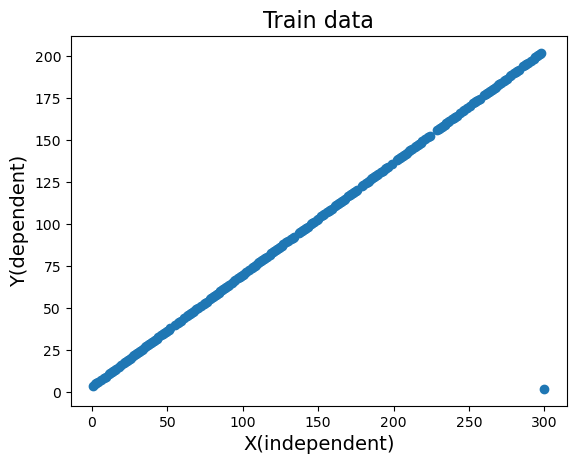

In [18]:

plt.scatter(X_train,y_train)
plt.title('Train data',fontsize=16)
plt.xlabel('X(independent)',fontsize=14)
plt.ylabel('Y(dependent)',fontsize=14)
plt.show()

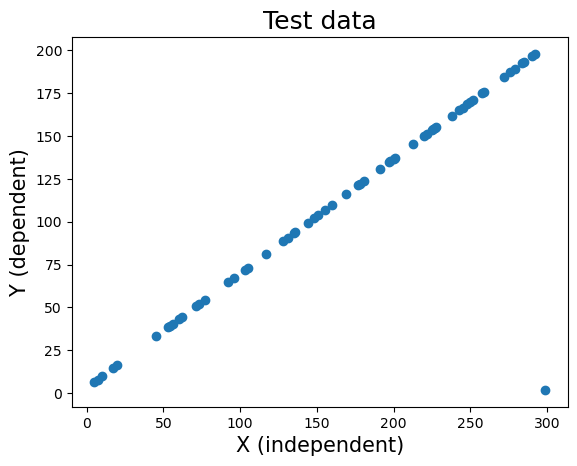

In [19]:
plt.scatter(X_test, y_test)
plt.title('Test data', fontsize=18)
plt.xlabel('X (independent)', fontsize=15)
plt.ylabel('Y (dependent)', fontsize=15)
plt.show()

In [20]:
model_tt = LinearRegression()

In [21]:
model_tt.fit(X_train,y_train)

LinearRegression()

In [22]:
y_predict_tt=model_tt.predict(X_test)

In [23]:
y_test[20],y_predict_tt[20]

(196.5555556, 193.24807031691157)

In [24]:
print(f'R2 Score:{r2_score(y_test,y_predict_tt)}')
print(f'RootMSE:{np.sqrt(mean_squared_error(y_test,y_predict_tt))}')
print(f'Coefficients:{model_tt.coef_[0]}')
print(f'InterceptL{model_tt.intercept_}')

R2 Score:0.804926077930459
RootMSE:25.524478413510792
Coefficients:0.6494358870752029
InterceptL4.911663065102715


In [25]:
df.tail(5)

,X,Y
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,1.888889
299,300,1.888889


In [26]:
find_coef(df)

{'x_mean': 150.5,
 'y_mean': 102.21555556172665,
 'k': 0.6400448894359696,
 'm': 5.888799701613223}

In [27]:
find_coef(df)

{'x_mean': 150.5,
 'y_mean': 102.21555556172665,
 'k': 0.6400448894359696,
 'm': 5.888799701613223}

In [28]:
X = df['X'].values
y = df['Y'].values
X = X.reshape(-1, 1)

In [29]:
model_tt_2 = LinearRegression()

In [30]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=21, shuffle=True)

In [31]:
model_tt_2.fit(X_train_2, y_train_2)

LinearRegression()

In [32]:
y_predict_tt_2 = model_tt_2.predict(X_test_2)

In [33]:
print(f'R2 Score: {r2_score(y_test_2, y_predict_tt_2)}')
print(f'Root MSE: {np.sqrt(mean_squared_error(y_test_2, y_predict_tt_2))}')
print(f'Coefficients: {model_tt_2.coef_[0]}')
print(f'Intercept: {model_tt_2.intercept_}')

R2 Score: 0.804926077930459
Root MSE: 25.524478413510792
Coefficients: 0.6494358870752029
Intercept: 4.911663065102715


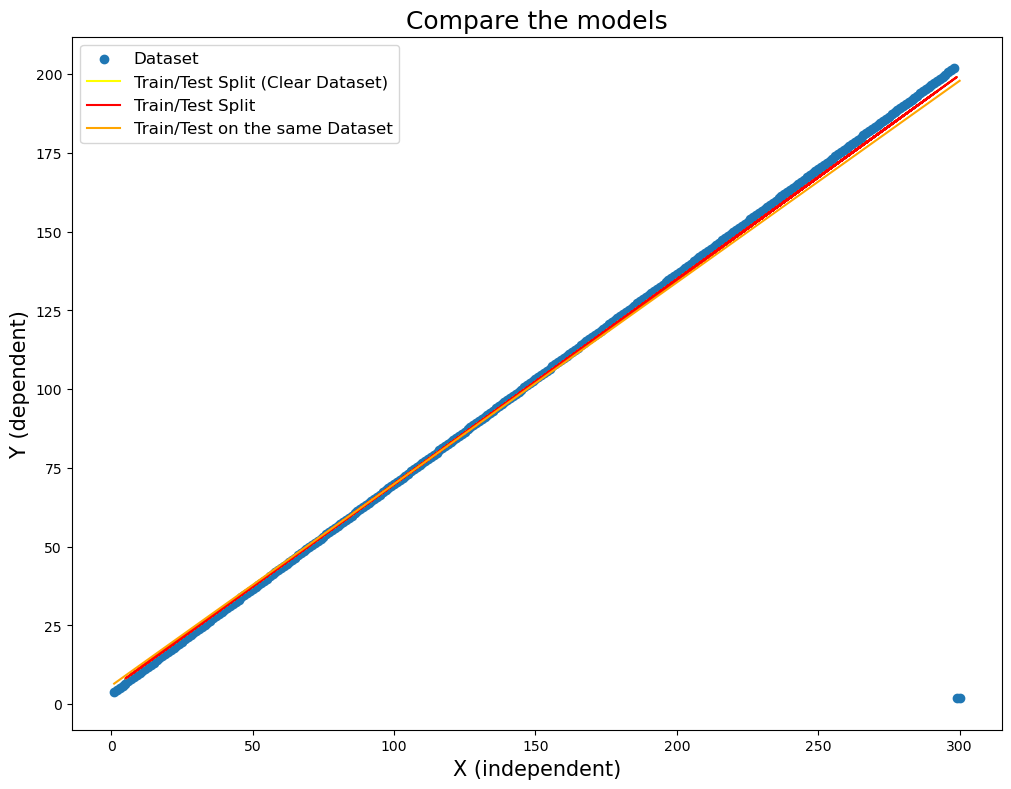

In [38]:
plt.figure(figsize=(12, 9))
plt.scatter(X_all, Y_all)
plt.plot(X_test_2, y_predict_tt_2, color='yellow')
plt.plot(X_test, y_predict_tt, color='red')
plt.plot(X_all, y_predict, color='orange')
plt.title('Compare the models', fontsize=18)
plt.xlabel('X (independent)', fontsize=15)
plt.ylabel('Y (dependent)', fontsize=15)
plt.legend(['Dataset', 'Train/Test Split (Clear Dataset)', 'Train/Test Split', 'Train/Test on the same Dataset'], fontsize=12)
plt.show()